# Unsupervised Learning: Clustering
## World Happiness Report 2021

## Index

1. Load and Explore Data
2. Correlation Analysis
3. Dimensionality Reduction
  - PCA
  - PCs Dependencies
  - PCA Variance Ratio
4. Clustering: apply 3 different approaches
  - By partitioning: K-means
  - By Hierarchy: Hierarchical Agglomerative Clustering
  - By density: BSCAN
5. Comparing Results

## 1. Load and Explore Data

In [1]:
# Load the Pandas libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load clustering libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

Loading initial dataset

In [4]:
# Read World Happiness Report 2021 dataset
dataURL = "../data/world-happiness-report-2021.csv"
raw_data = pd.read_csv(dataURL)
print(raw_data.shape)

(149, 20)


In [5]:
# Show first 5 rows of header dataframe
raw_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
# Show first 5 rows of header dataframe
raw_data.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

## 2. Correlation Analysis

In [7]:
# Split data into header and skills dataframes
header = pd.DataFrame()
X_data = pd.DataFrame()

for col in raw_data.columns:
    if col in ["Country name", "Regional indicator"]:
        header[col] = raw_data[col]
    else:
        X_data[col] = raw_data[col]

In [8]:
# Standardizing of the data
X_std = StandardScaler().fit_transform(X_data)

# Show standardized data
X_std_df = pd.DataFrame(data=X_std, columns=X_data.columns)
X_std_df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2.157462,-1.220020,2.146959,2.164930,1.162885,1.216171,1.039750,1.393550,-0.551886,-3.031228,0.0,1.162278,1.211951,1.040206,1.399227,-0.551838,3.034464,1.535298
1,1.950046,-1.083204,1.940446,1.955986,1.299717,1.216171,1.143618,1.366990,0.300594,-3.070416,0.0,1.301105,1.219702,1.143831,1.362843,0.305830,3.069559,0.816798
2,1.904265,-1.037599,1.898573,1.908332,1.459064,1.111370,1.395869,1.127948,0.267294,-2.437802,0.0,1.459764,1.107300,1.393475,1.122712,0.264989,2.437852,0.762677
3,1.888382,0.011325,1.924268,1.851513,1.252086,1.469440,1.188133,1.446671,1.166393,-0.304829,0.0,1.251524,1.467763,1.186224,1.450164,1.173708,0.305843,1.001555
4,1.804294,-1.448047,1.779614,1.825854,1.298851,1.111370,1.099103,1.074828,1.266293,-2.180278,0.0,1.298626,1.107300,1.096729,1.079052,1.265601,2.183415,0.686161


In [9]:
# Calculate correlations between numerical columns
corr_data = X_std_df.corr()

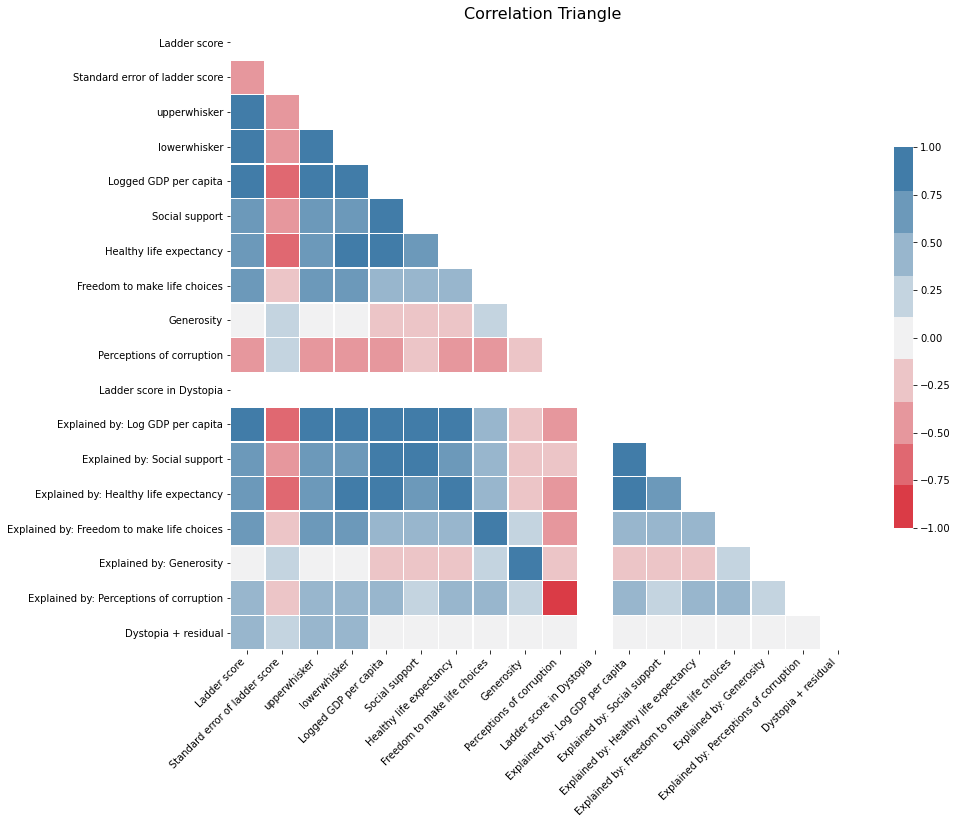

In [10]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Add title
ax.set_title("Correlation Triangle", fontsize=16)
plt.show()

## 3. Dimensionality Reduction

### 3.1. PCA

In [11]:
# Principal Component Analysis
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X_std_df)

In [12]:
# Create and show principal components DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df = pd.concat([pca_df, header[["Country name"]]], axis=1)
pca_df = pca_df[pca_df["PC1"].notnull()]
pca_df

,PC1,PC2,PC3,PC4,PC5,Country name
0,-5.972138,1.518834,-0.069754,-3.070675,0.113139,Finland
1,-5.808125,2.282603,0.659844,-2.179681,0.446177,Denmark
2,-5.627464,1.643582,0.443745,-1.622938,0.656840,Switzerland
3,-4.759780,1.606588,-1.488458,1.109401,0.265571,Iceland
4,-5.182701,2.543330,0.446656,-0.607340,1.137957,Netherlands
...,...,...,...,...,...,...
144,5.345579,-0.909682,-0.060946,0.339966,-1.677819,Lesotho
145,2.510352,-2.047918,3.024709,0.458897,-2.741175,Botswana
146,3.183594,3.579027,4.550252,-2.772415,-1.918556,Rwanda
147,4.659604,-0.843786,2.396353,0.784114,-0.709189,Zimbabwe


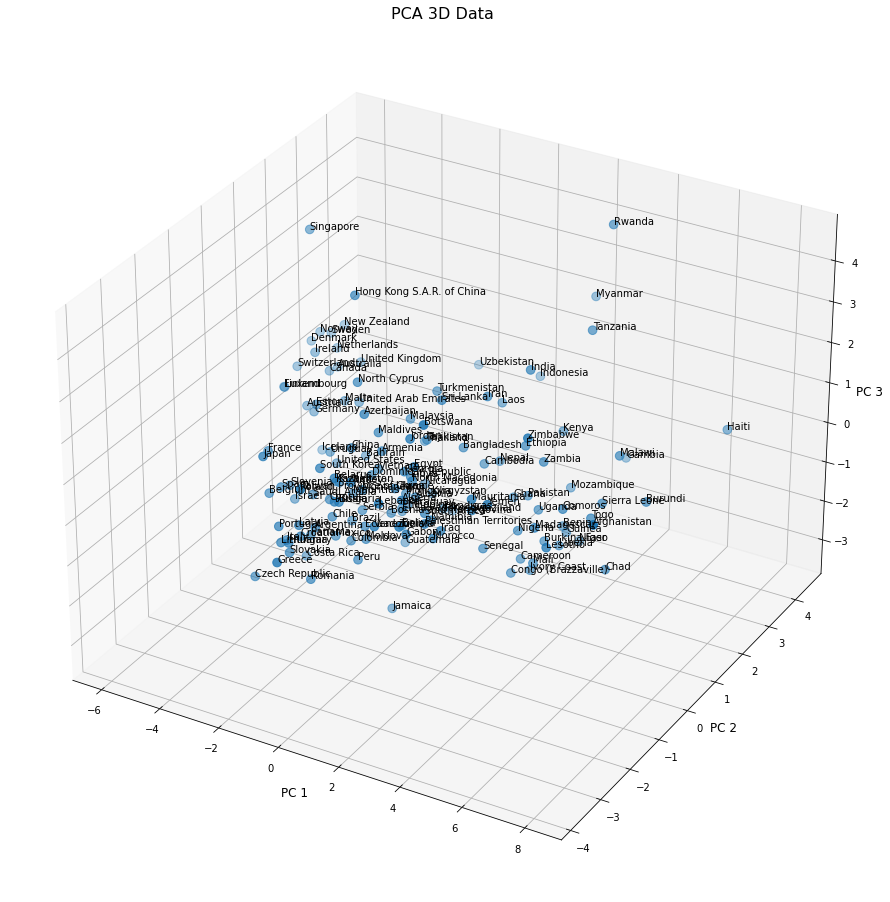

In [13]:
# Create 3D scatter plot
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection="3d")

# Get (x, y, z) axis values
xx = pca_df["PC1"].values
yy = pca_df["PC2"].values
zz = pca_df["PC3"].values

# Plot values
ax.scatter(xx, yy, zz, c="#1f77b4", marker="o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(X_std_df)):
    ax.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), pca_df['Country name'][ix], 
            horizontalalignment="left", size="medium", color="black", weight="normal")

# Plot setup
ax.set_xlabel("PC 1", fontsize = 12)
ax.set_ylabel("PC 2", fontsize = 12)
ax.set_zlabel("PC 3", fontsize = 12)
ax.set_title("PCA 3D Data", fontsize=16)
ax.grid()

### 3.2. PCs Dependencies

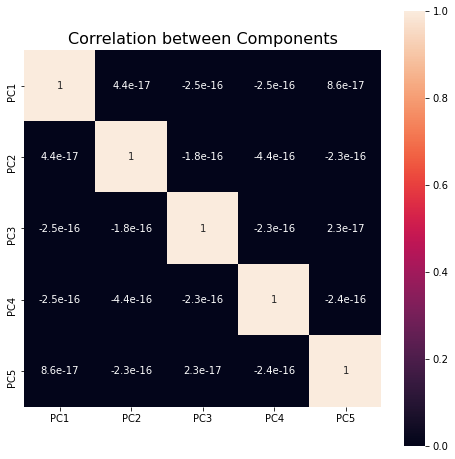

In [14]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(pca_df.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize=16)
plt.show()

As can be seen in the plot above, all principal components (PCs) are orthogonal.

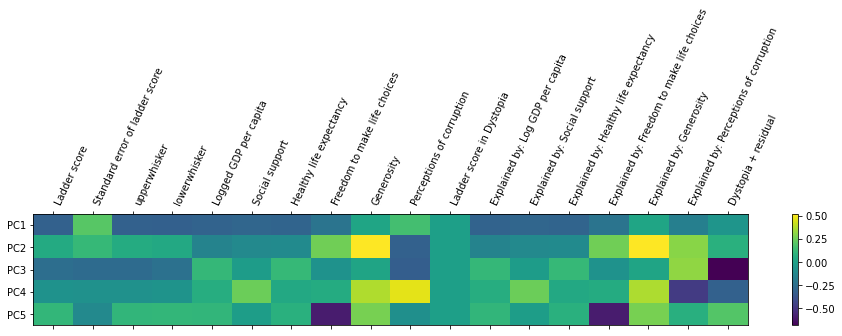

In [15]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize=(16, 2))
plt.matshow(pca.components_, cmap="viridis", fignum=fig.number, aspect="auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_std_df.columns)), X_std_df.columns, rotation=65, ha="left")
plt.show()

### 3.3. PCA Variance Ratio

In [16]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.5340240483249359,
 0.15383817435133468,
 0.09633697732944016,
 0.08106757554875987,
 0.06022575281923455]

In [17]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

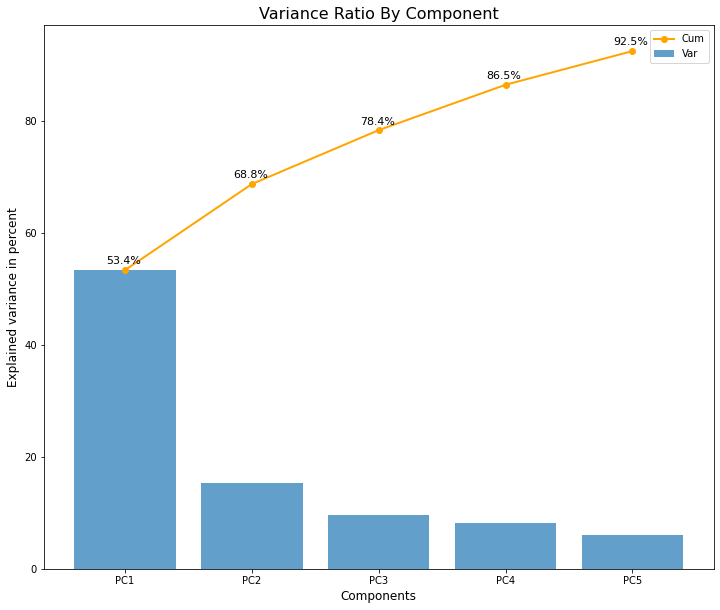

In [18]:
# Set up the matplotlib figure
fig, ax2 = plt.subplots(figsize=(12, 10))

plt.bar(y_pos, values, align="center", alpha=0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color="orange", linewidth=2, marker="o")
plt.title("Variance Ratio By Component", fontsize=16)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize=12)
plt.ylabel("Explained variance in percent", fontsize=12)
plt.legend(("Cum", "Var"), loc="best")
plt.show()

## 4. Clustering: apply 3 different approaches

In [19]:
# Getting the values and plotting it
k = 3
x = pca_df['PC1'].values
y = pca_df['PC2'].values
train_data = np.array(list(zip(x, y)))
#train_data = pca_data

n_data = len(train_data)

In [20]:
def plot_clusters(method, data, labels, centroids=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotting vars
    colors = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

    # Create scatter plot
    for i in range(k):
        points = np.array([data[j] for j in range(n_data) if labels[j] == i])
        sns.scatterplot(ax=ax, x=points[:, 0], y=points[:, 1], size=5, color=colors[i])
    
    if not centroids is None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="D")

    # Plot setup
    ax.set_xlabel("PC 1", fontsize=12)
    ax.set_ylabel("PC 2", fontsize=12)
    ax.set_title("Clustering by " + method, fontsize=16)
    ax.legend("")
    ax.grid()

### 4.1. By partitioning: K-means

In [21]:
# Apply k-Means
kmeans = KMeans(n_clusters=k, algorithm="elkan", random_state=0)
kmeans = kmeans.fit(train_data)

# Centroid values
centroids = kmeans.cluster_centers_

# Getting the cluster labels
clusters = kmeans.predict(train_data)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

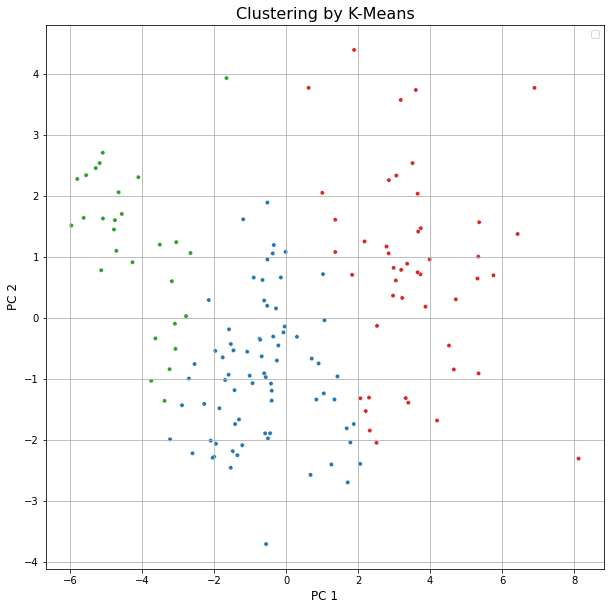

In [22]:
plot_clusters("K-Means", train_data, clusters)

### 4.2. By Hierarchy: Hierarchical Agglomerative Clustering

In [23]:
linked = linkage(train_data, 'single')
labelList = range(1, n_data+1)

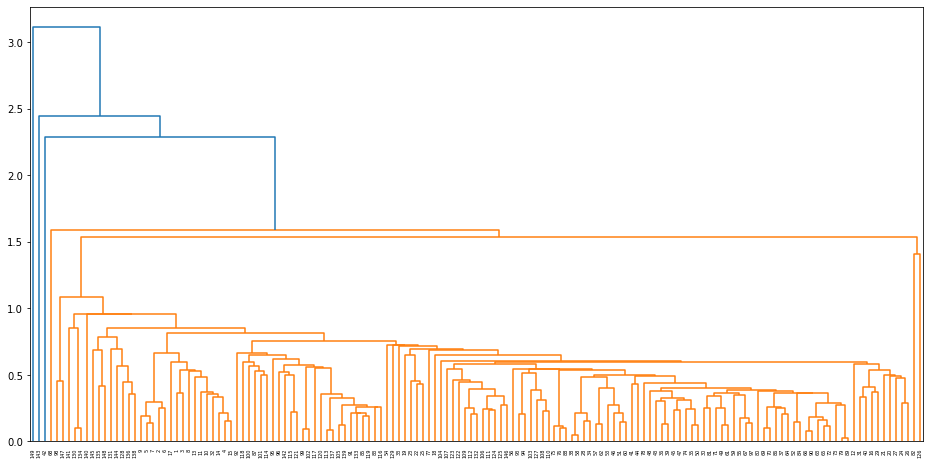

In [24]:
plt.figure(figsize=(16, 8))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [25]:
# Apply Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster = hac.fit_predict(pca_data)
cluster

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

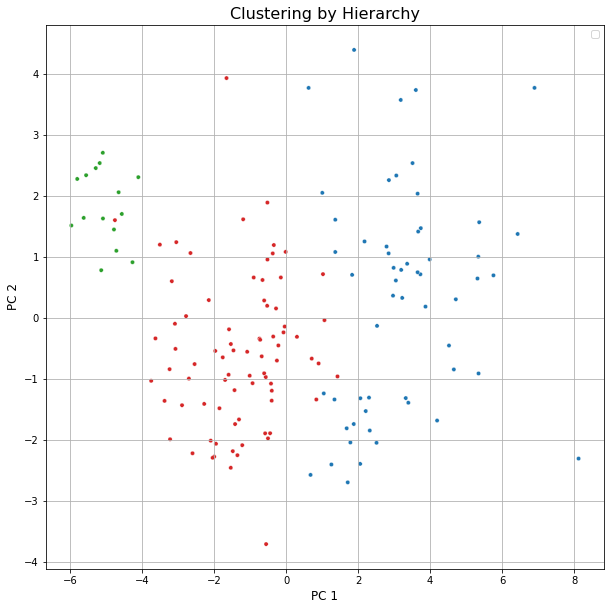

In [26]:
plot_clusters("Hierarchy", train_data, cluster)

### 4.3. By density: BSCAN

In [27]:
dbscan = DBSCAN(eps=1.2, min_samples=6).fit(pca_data)
clusters = dbscan.labels_
clusters = abs(clusters)
clusters

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

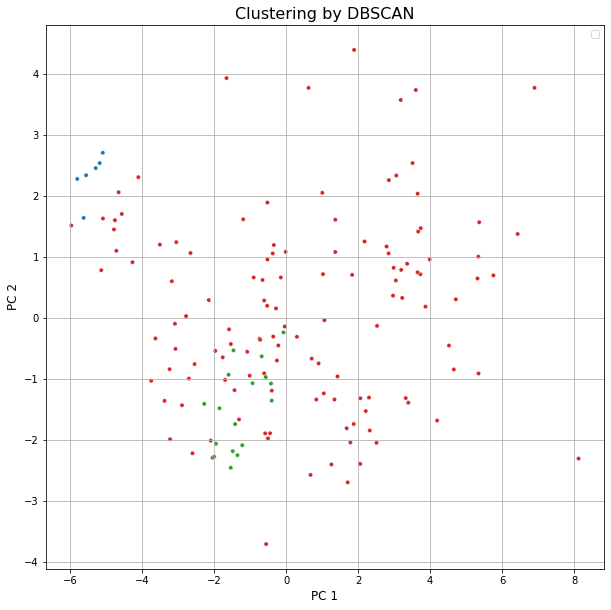

In [28]:
plot_clusters("DBSCAN", train_data, clusters)

## 5. Comparing Results

<hr>
<p><a href="https://ansegura7.github.io/WorldHappinessReport/">« Home</a></p>